# Intro to Machine Learning Final Project
## Author: Andrew Y

  This is a machine learing project utilizing supervised learning.  My project will be dealing with data relating to the structural integrity of concrete, and will utilize supervised learning to predict the strength of the concrete when given information on the concrete components.  We will be utilizing supervised learning as the data set contains the strength of existing concrete along with their components in which we can use as labels for our machine learning model.  The value of the strength is a numerical value so thus we will use regression models to undertake this task (in particular multilinear regression, KNN regression, and decision tree regression models).

## External Libraries

The libraries I will be utilizing for this project of note are pandas for general data science usage, seaborn for data visualization, and sklearn for machine learning modeling.

In [1]:
# Imported Libraries

import numpy as np
import pandas as pd

import matplotlib.pylab as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

## Data

The dataset that we are using is the Concrete Strength Predictor dataset found on Kaggle that can be found at (https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength?resource=download).  The dataset has 9 columns or features, and has 1030 rows of data.



In [2]:
# Initial data import and shape 

df0 = pd.read_csv('ConcreteStrengthData.csv')
print(df0.shape)

(1030, 9)


The 9 features are as follows: (copied from the dataset description)

    CementComponent:- Amount of cement is mixed
    BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
    FlyAshComponent:- Amount of FlyAsh is mixed
    WaterComponent:- Amount of water is mixed
    SuperplasticizerComponent:- Amount of Super plasticizer is mixed
    CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
    FineAggregateComponent:- Amount of Coarse Aggregate is mixed
    AgeInDays:- How many days it was left dry
    Strength:- What was the final strength of concrete- (Target)

Of note is the Strength column, as that is our target that we will be attempting to predict.  Another thing to note is that all the columns contain numerical data value types, though unfortunately the dataset description does not include their respective measuring units so we can only treat them as ratios.

In [3]:
# Describing the data for overview

df0.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Data Cleaning



Fortunately the dataset is relatively clean, with no NA or missing values thus we do not have to worry about imputing any data.  We rename one column for ease of use as it had a trailing whitespace after the name.  To check for imbalance in the target value we plotted the distribution and it turned up as a normal distribution, which should be viable for machine learning.  We also plotted boxplots on the features to check for outliers in our data, and while there are several I believe that they are few enough in number to not cause any major shifts in the training process.

In [4]:
# Importing dataset to use and small cleaning

df = pd.read_csv('ConcreteStrengthData.csv')

df.rename(columns={'CementComponent ': 'CementComponent'}, inplace = True)

In [5]:
# Checking for missing values

df.isna().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

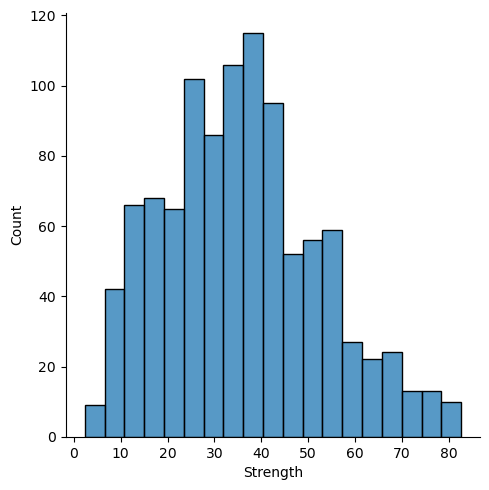

In [6]:
# Checking target feature for imbalance

sns.displot(x = df['Strength'])
plt.show()

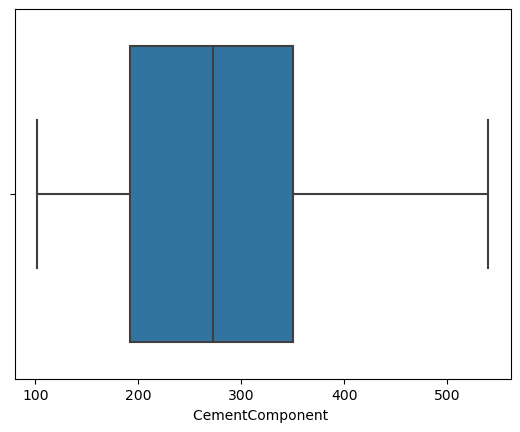

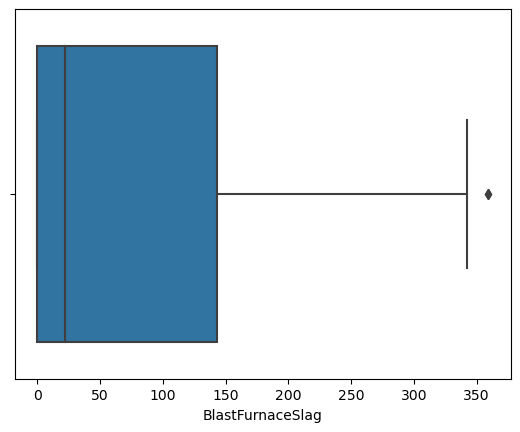

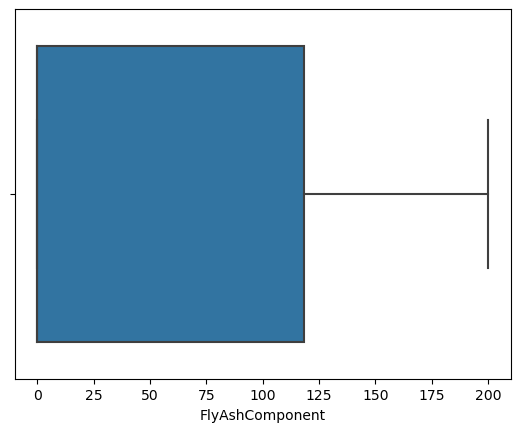

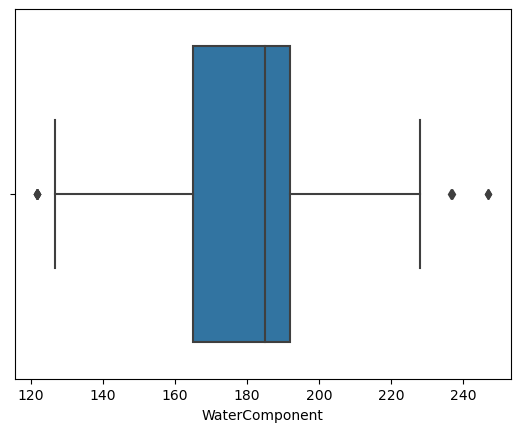

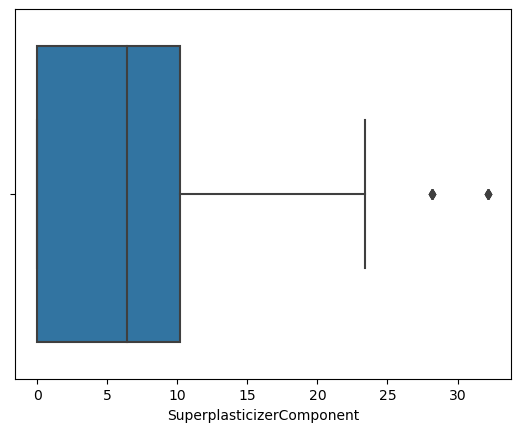

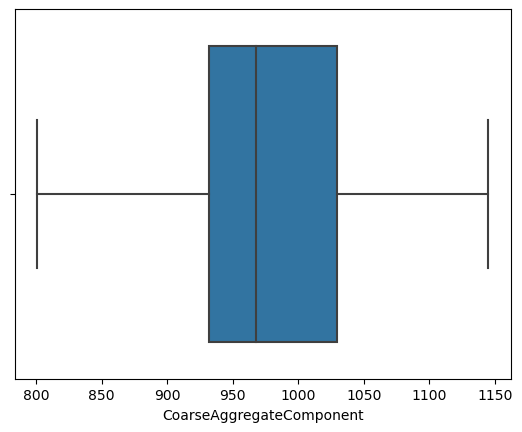

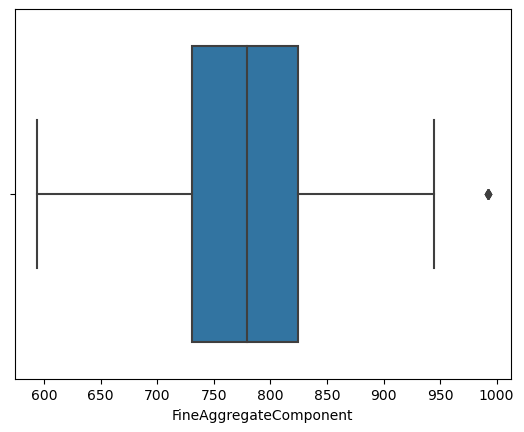

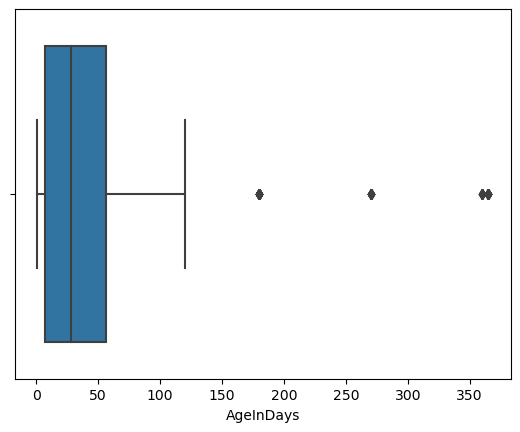

In [7]:
# Boxplots for all features to view outliers excluding our target value

for i, col in enumerate(df0.columns[:-1]):
    plt.figure(i)
    sns.boxplot(x = df0[col])
    plt.show()

## Exploratory Data Analysis

To view how each feature interacts with our target value of 'Strength', we plot each feature along with our target in a scatterplot to view the distribution.  Optimally, we want to see either a diagonal line of dots from the bottom left to top right or top left to bottom right as this would symbolize a strong correlation between the feature and our target, and thus would be a confident predictor for our model.

Unfortunately, the majority of plots turned out to be messy with only 'CementComponent' and 'AgeInDays' showing any sign of a diagonal direction.  I believe this is a sign that there is no feature that individually has a strong correlation with our target value, and I predict that this will mean some hefty feature engineering will be required.

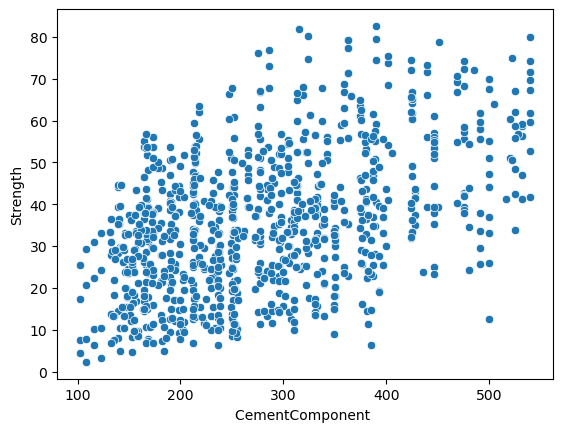

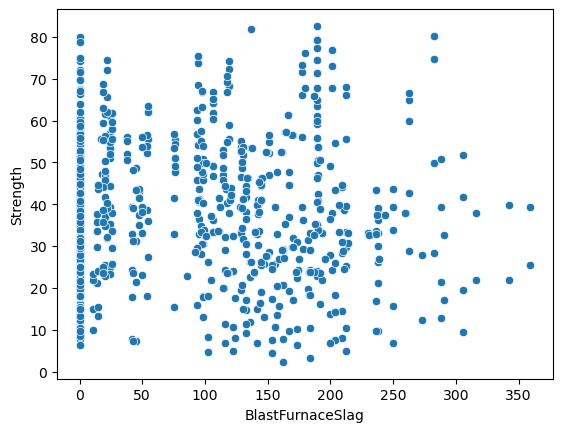

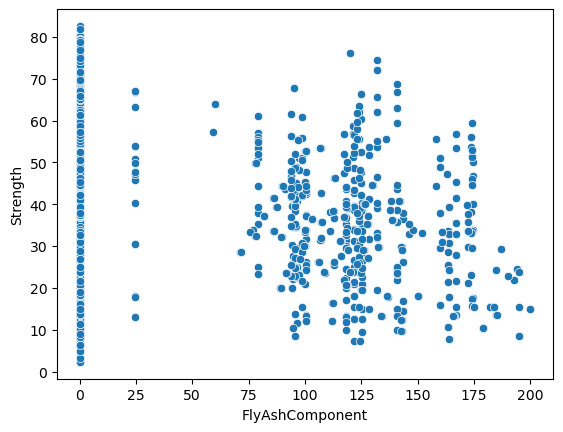

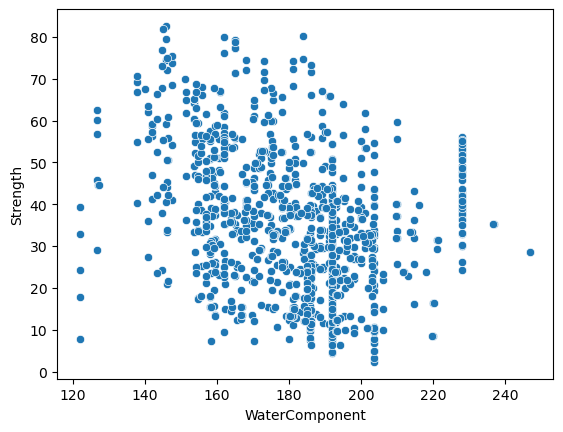

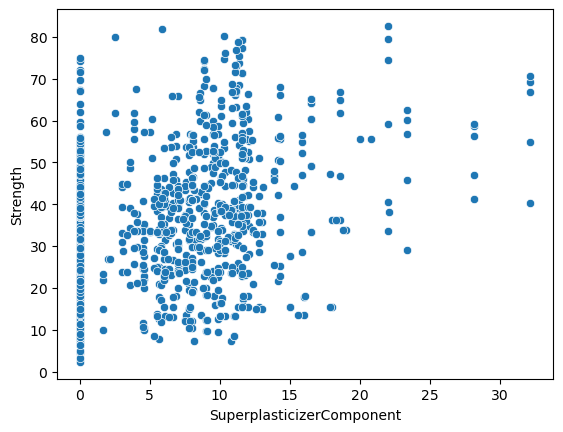

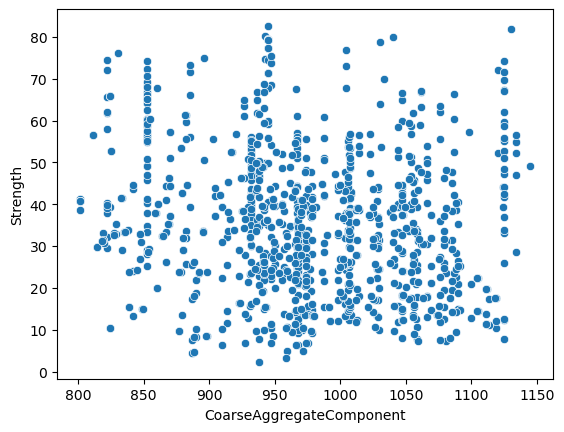

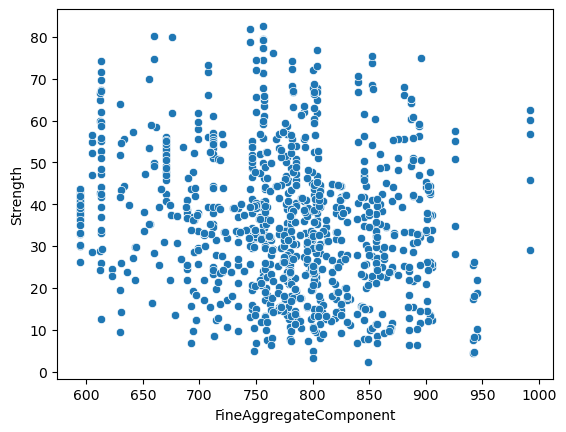

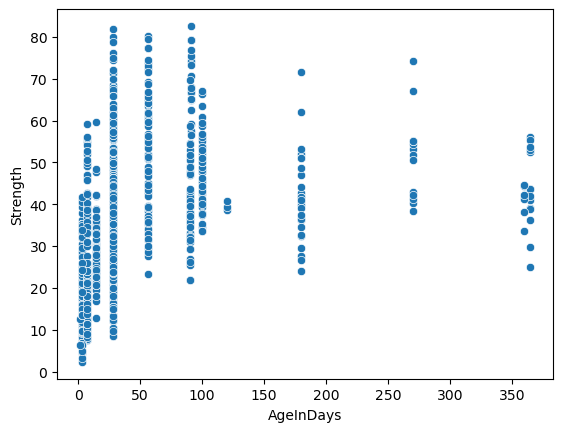

In [8]:
# EDA exploring relationship between each feature and our target

for i, col in enumerate(df0.columns[:-1]):
    plt.figure(i)
    sns.scatterplot(x = df0[col], y = df0['Strength'])
    plt.show()

## Checking Correlation and Addressing Multi-Collinearity

We then check the correlation matrix of our features to get a more in-depth view of how our features interact with each other.  In our correlation matrix, we in our target feature 'Strength' we can see that it is not in particularily correlated with any individual value in particular, with 'CementComponent' being the highest contender at 0.5.

In terms of multi-collinearity, the features themselves are not correlated with each other as well.  The pair that comes the closest would be 'WaterComponent' and 'SuperplasticizerComponent' at -0.66, which is nearing but just shy of the 0.7 limit so I believe that it can be ignored for now.

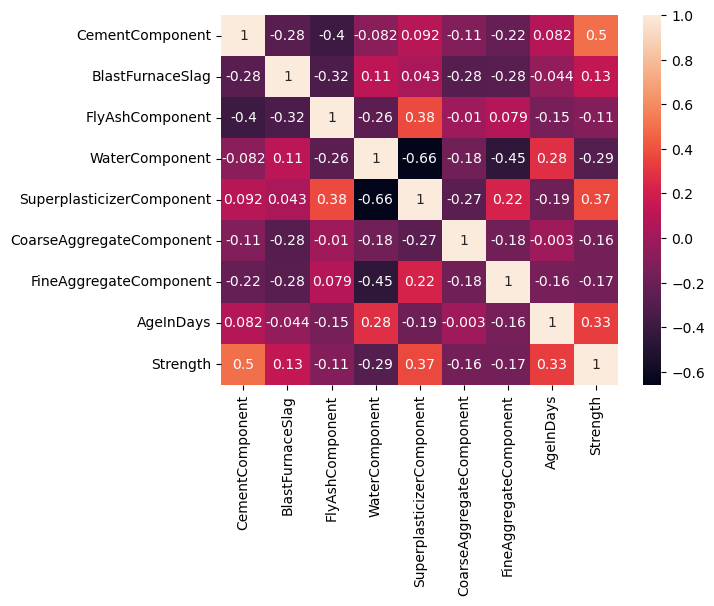

In [9]:
# Viewing the correlation matrix between our features

sns.heatmap(df.corr(), annot = True)
plt.show()

## Preliminary Model

This is a preliminary linear regression model that utilizes all the features in their original state to see how a base model with no changes would perform.  We end up with an R^2 score of around ~0.6, which is not amazing but works as a decent starting point.

In [10]:
# Preliminary model with all features and no changes or hyperparameters set

y = df['Strength']
X = df.drop(['Strength'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr0 = LinearRegression().fit(X_train, y_train)

r2_score(y_test, lr0.predict(X_test))

0.5969851098437959

# Feature Engineering

To improve our features, we undergo feature engineering.  From our exploratory data analysis, we can understand that individually these features are not strong predictors for our target value.  However we can bring in outsider knowledge to try and figure out how to improve our results.  From an article on the site 'The Constructor' (https://theconstructor.org/concrete/factors-affecting-strength-of-concrete/6220/), it lists several factors that affect the strength of concrete, in which some may be related to the data that we are working with.  In particular, some factors of note are 'Water / Cement Ratio', 'Coarse / Fine Aggregate Ratio', and 'Age of Concrete'.  These all utilize data that is contained in our dataset, mainly the features 'WaterComponent', 'CementComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', and 'AgeInDays'.  In addition, I came across another article on the site 'Concrete Construction' (https://www.concreteconstruction.net/how-to/materials/how-super-are-superplasticizers_o) that details the interesting property of superplasticizers and water where the lower the water and the higher the superplasticizer, the stronger the resulting strength; this is a feature we can also create given our current data.

Thus we can combine our features to create new ones that mimic the factors listed in the article.  Forunately our 'Water / Cement Ratio' resulted in a feature that has more of a solid curve when compared to our target value in comparison to its predecessors, though our 'Coarse / Fine Aggregate Ratio' feature ended up equally messy as its predecessors.  However our new 'SuperplasticizerComponent' feature did prove somewhat useful, as it begun to have somewhat of a curve.

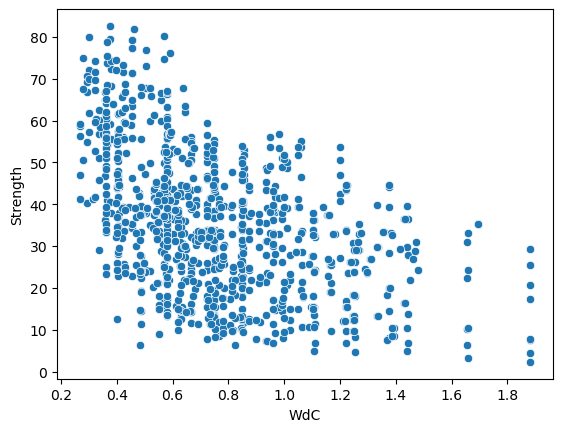

In [11]:
# Water / Cement Ratio

df['WdC'] = df['WaterComponent'] / df['CementComponent']

sns.scatterplot(x = df['WdC'], y = df['Strength'])
plt.show()

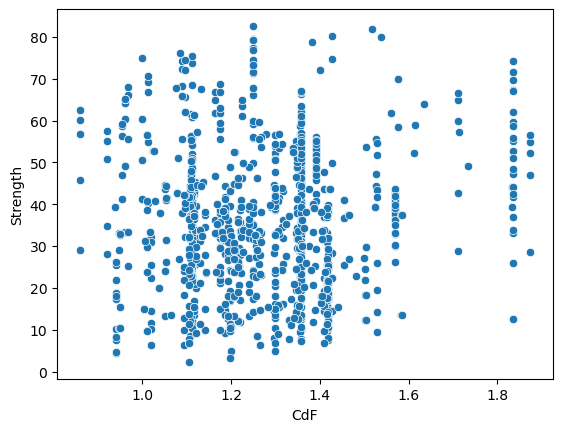

In [12]:
# Coarse / Fine Aggregate Ratio

df['CdF'] = df['CoarseAggregateComponent'] / df['FineAggregateComponent']

sns.scatterplot(x = df['CdF'], y = df['Strength'])
plt.show()

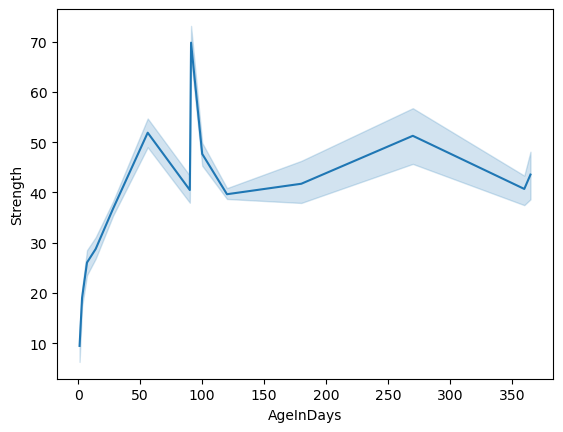

In [13]:
# Age In Days

sns.lineplot(x = df['AgeInDays'], y = df['Strength'])
plt.show()

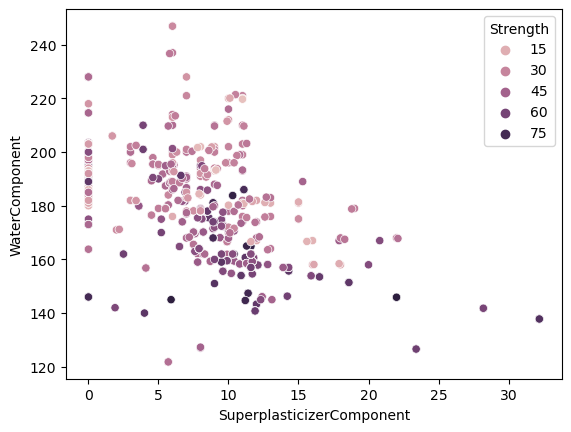

In [14]:
# Viewing relation between Superplasticizer versus Water Component

sns.scatterplot(x = df['SuperplasticizerComponent'], y = df['WaterComponent'], hue = df['Strength'])
plt.show()

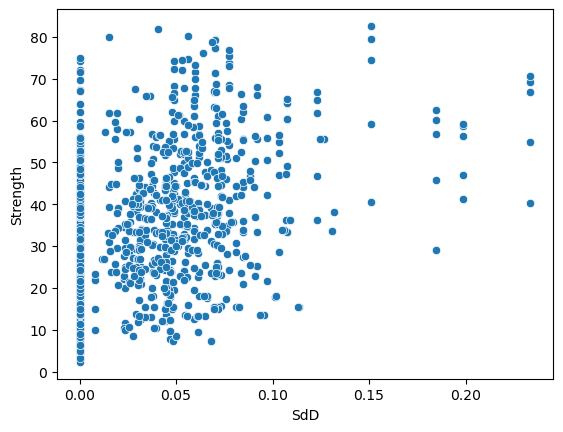

In [15]:
# Superplasticizer and Water Ratio

df['SdD'] = df['SuperplasticizerComponent'] / df['WaterComponent']

sns.scatterplot( x = df['SdD'], y = df['Strength'])
plt.show()

## Revisiting Linear Regression

After undergoing feature engineering, we will go back to our linear regression model and test it out.

In summary:

- First linear regression model utilized only the engineered features and resulted in a R^2 score of 0.45.

- Second linear regression model utilized the engineered features and the leftover features and resulted in a R^2 score of 0.58.

- Third linear regression model utilized the same as the second but removed the 'Coarse / Fine Aggregate Ratio' as it did not seem like it was contributing much, and resulted in a R^2 score of 0.57.

As the results did not improve much, we will swap to another ML model and test their performance.

In [16]:
# Linear regression with engineered features

cols = ['WdC', 'CdF', 'AgeInDays', 'SdD']

y = df['Strength']
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr1 = LinearRegression().fit(X_train, y_train)

lr1.score(X_test, y_test)

0.44561211887481134

In [17]:
# Linear regression with engineered features and leftover features

cols = ['WdC', 'CdF', 'AgeInDays', 'SdD', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent']

y = df['Strength']
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr2 = LinearRegression().fit(X_train, y_train)

lr2.score(X_test, y_test)

0.5799133318380572

In [18]:
# Linear regression same as above but without the coarse and fine aggregate ratio

cols = ['WdC', 'AgeInDays', 'SdD', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent']
y = df['Strength']
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr3 = LinearRegression().fit(X_train, y_train)

lr3.score(X_test, y_test)

0.5811305652575776

## KNeighbors Regressor

This time we will attempt using a KNeighbors Regressor model for our data.  With similar inputs to our linear regression model, we utilized a for loop to determine the best number of neighbors to use.  The result came in at a neighbor value of 3, with a resulting score of 0.72 which is an improvement over our linear regression model.  After this to test one more ML model, we will see our performance on a decision tree instead.

In [19]:
# Testing KNN from 1 to 20 neighbors to see which one has the best performance

cols = ['WdC', 'AgeInDays', 'SdD', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent']
y = df['Strength']
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


for i in range(1,21):
    print(i, KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train).score(X_test, y_test))


1 0.6895487352688517
2 0.7128126728548196
3 0.7151063094701597
4 0.6894136782573035
5 0.6833528917992653
6 0.69246712671416
7 0.6929285501007797
8 0.6928571025022898
9 0.690599539915451
10 0.6773733543621618
11 0.6724873705743455
12 0.6648873107688831
13 0.6659237816331234
14 0.6620800472657337
15 0.656397738216977
16 0.6518573462044744
17 0.6465320748130731
18 0.641493839873189
19 0.6328472692020011
20 0.6301926092703374


In [20]:
# Utilizing KNN with 3 neighbors from our prior result

cols = ['WdC', 'AgeInDays', 'SdD', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent']
y = df['Strength']
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7151063094701597


## Decision Tree Regressor

Next we attempt to utilize a decision tree regressor.  With no changes to our hyperparameters, our decision tree resulted in a score of 0.80 which is our highest so far and thus will be utilized for our final model.

In [21]:
# Utilizing decision trees

cols = ['WdC', 'AgeInDays', 'SdD', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent']
y = df['Strength']
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dt1 = DecisionTreeRegressor().fit(X_train, y_train)

print(dt1.score(X_test, y_test))

0.8135610090770604


## Hyperparameter Tuning

With the usage of GridSearchCV, I decided to undergo hyperparameter tuning on my prior decision tree results to see if I can push the score even higher.  I set my parameters as various values of the maximum depth involved and the minimum amount of leaves for samples, and the result was that the best performance came from a maximum depth of 15 and 5 minimum samples leaves.  However while the resulting model with the inputed hyperparameters was faster to finish, the score itself changed by a miniscule amount and thus did not improve by much.

In [22]:
# Utilizing GridSearchCV to find the best parameters to use

dt2 = DecisionTreeRegressor()
parameters = {'max_depth': [3,5,7,10,15,30], 'min_samples_leaf':[1,2,5,10]}
clf = GridSearchCV(dt2, parameters)
clf.fit(X_train, y_train)

print(clf.best_estimator_)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)


In [23]:
# Utilizing the parameters in attempt to increase our decision tree score further

dt2 = clf.best_estimator_.fit(X_train, y_train)

print(dt2.score(X_test, y_test))

0.804561570693907


## Results and Analysis

In summary, in the end our best result was by using the Decision Tree Regressor which resulted in a R^2 score of roughly 0.80.  I utilized the R^2 score metric for the main analysis throughout this project is I believe it is the most suitable metric for regression based models due to it being able to describe how much of our accurate predictions coulud be explained by the model.  While the adjusted R^2 metric would be more accurate than the normal R^2 metric, I could not find a proper sklearn function for it sadly, though through manually calculating it, it did not deviate too much from the regular R^2 metric.

Below is a plot of the progress of how our chosen model's score improved based on our choices.  I believe that as a result of the low individual correlation between the features and the target, as well as my low skill in feature engineering, led to the low performance on the linear regressions.  In comparison, KNN and Decision Trees worked better as their respective algorithms are more suited for advanced feature interaction.  Between KNN and decision trees, it seems that decision trees worked better in ways that I suspect that decision trees have an advantage over KNN when features have more of a non-linear relationship, due to neighbors not being close just because they are similar.

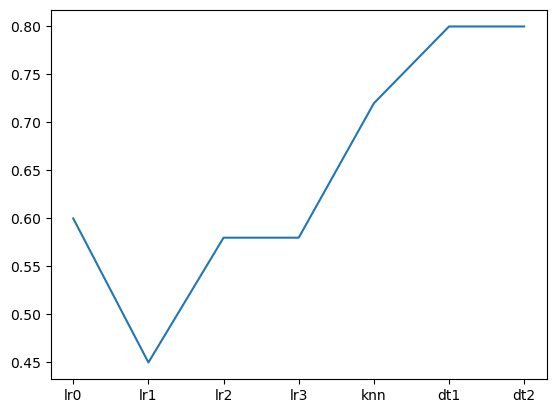

In [24]:
# Plotting our model performance to show improvement over time

m = ['lr0', 'lr1', 'lr2', 'lr3', 'knn', 'dt1', 'dt2']
s = [0.60, 0.45, 0.58, 0.58, 0.72, 0.80, 0.80]

sns.lineplot(x = m, y = s)
plt.show()

## Discussion and Conclusion

The main takeaway from this model is that having little to no features that are correlated with the target value made things tricky and drastically reduced the performance of models such as linear regression models that are reliant on having solid features to rely on.  I belive the reason that my model did not perform well at the start was that my feature engineering was poor and did not produce reliable predictors to utilize, and thus is something I should work on bettering myself with.  I was fortunate that KNN and decision trees had built-in prowess that covered up for my shortcoming, though I need more general practice on feature engineering in general.  In addition more in-depth research on the target subject would have helped as well since more domain knowledge could introduce more ideas to use for feature engineering.